In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### hypothesis method
To estimate my weight, however my scale is pretty inaccurate, I predict my weight via guessing I gain 1 kilogram everyday due to eating lots of foods. 
Therefore, I make a prediction which based on guess.

But, if prediction is very inaccurate, and how I should get the more accurate weights. We can estimate it! The estimation is consist of different weights of prediction and measurement.

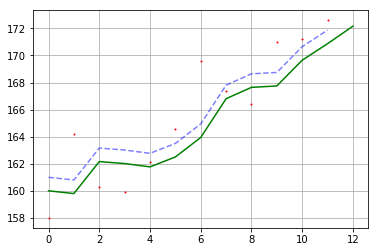

In [2]:
def simple_guess():
    weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
    time_step = 1.0  # day
    scale_factor = 0.4
    initial_guess = 160.
    gain_rate = 1
    
    estimates, predictions = [initial_guess], []
    for idx, w in enumerate(weights):
        prediction = estimates[idx] + gain_rate * time_step
        # update filter
        weight = prediction + scale_factor * (w-prediction)
        
        estimates.append(weight)
        predictions.append(prediction)    
    plt.grid()
    plt.plot(weights, 'ro', markersize=1., color='r')
    plt.plot(estimates, markersize=1., color='g')
    plt.plot(predictions, '--', color='b', alpha=.5)
    plt.show()
simple_guess()

But, this hypothesis is really simple, and gaining factor is always not a constant. Furtheremore, if your guess of initial weight far away from measurement, the accuracy will be terrible. Therefore, we must change this hypothesis to intelligenct method, 'g-h filter'.

In [3]:
def simple_gh(measurements, estimate, gain_rate=1., time_step=1., g=6./10, h=2./3):
    """ g-h filter is the basis for enormous number of filters,
     including our main topic, Kalman Filter, which will vary g and h dynamically at each time step.
    
    Argument:
        measurements: list of measurements
        estimate: init estimate value
        gain_rate: scaling factor for prediction
        g: scaling for measurement
        h: scaling for the change in measurement over time.
    Return:
        null
    """
    estimates, predictions = [], []
    for measurement in measurements:
        prediction = estimate + (gain_rate*time_step)
        residual = measurement - prediction
        gain_rate = gain_rate + h * residual/time_step
        estimate = prediction + g * residual
        
        estimates.append(estimate)
        predictions.append(prediction)
    plt.grid()
    plt.plot(measurements, 'ro', markersize=3.)
    plt.plot(estimates, color='g')
    plt.plot(predictions, 'b--', alpha=.5)
    plt.show()

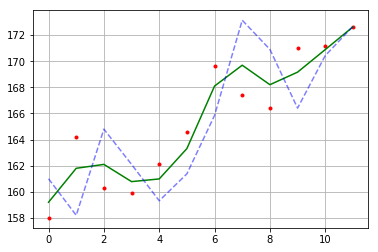

In [4]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
estimate = 160.
simple_gh(measurements=weights, estimate=estimate)

random more sophisticated data, and try different factor of g and h.

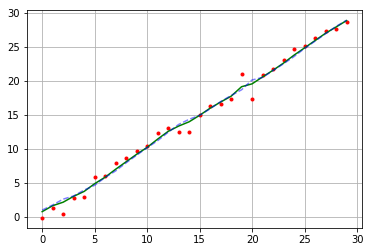

In [5]:
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + np.random.randn()*noise_factor for i in range(count)]

measurements = gen_data(0, 1., 30, 1.)
simple_gh(measurements=measurements, estimate=0., g=.2, h=.02)

if our initial estimate is far away from measurement which means we overlook, and how to solve this problem? Not yet, I just want to show you the phenomenon.

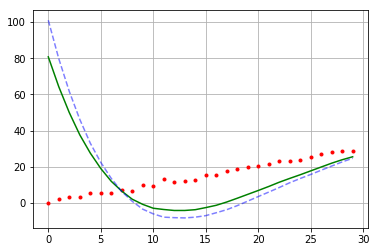

In [6]:
measurements = gen_data(0, 1., 30, 1.)
simple_gh(measurements=measurements, estimate=100., g=.2, h=.02)

I think you are tired, taking a break, and see you next notebook:)